# EDA (Exploratory Data Analysis)

The data consists in demographic and service information about 7043 customers from a fictional telco company. The original data belong to IBM (https://community.ibm.com/community/user/blogs/steven-macko/2019/07/11/telco-customer-churn-1113) and it has been extracted from Kaggle (https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

The objective of this project is to analyze why the customer churn from this company and be able to predict if a certain customer is going to churn with predictive models.

The data consists on the following 21 columns:

**CustomerID**: A unique ID that identifies each customer.

**Gender**: The customer’s gender: Male, Female

**SeniorCitizen**: Indicates if the customer is 65 or older: Yes, No

**Partner**: Indicates if the customer has a partner: Yes, No

**Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**Tenure**: Indicates the total amount of months that the customer has been with the company.

**PhoneServie**: Indicates if the customer subscribes to home phone service with the company: Yes, No

**MultipleLines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No, No phone service

**InternetService**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic.

**OnlineSecurity**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No, No internet service

**OnlineBackup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No, No internet service

**DeviceProtection**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No, No internet service

**TechSupport**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No, No internet service

**StreamingTV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No, No internet service. The company does not charge an additional fee for this service.

**StreamingMovies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No, No internet service. The company does not charge an additional fee for this service.

**Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**PaperlessBilling**: Indicates if the customer has chosen paperless billing: Yes, No

**PaymentMethod**: Indicates how the customer pays their bill: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)

**MonthlyCharges**: Indicates the customer’s current total monthly charge for all their services from the company.

**TotalCharges**: Indicates the customer’s total charges, calculated to the end of the quarter.

**Churn**: Indicates if the customer has churned: Yes, No

Let's take a first sight at the dataset:

In [1]:
import pandas as pd

df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


From the description of the dataset we can notice that the column TotalCharges is in object type, but it should be a Float64 as the columns MonthlyCharges. That could be because some rows have a string value. Let's check it:

In [48]:
value = []
for i, elem in enumerate(df["TotalCharges"]):
    try:
        float(elem)
    except:
        value.append((i, elem))

print(f"There are {len(value)} not convertible to float64 values in column TotalCharges.")
print(value)

df = df.drop([i for i, _ in value])
df["TotalCharges"] = df["TotalCharges"].astype("float64")
df.reset_index(drop=True, inplace=True)

df.info()

There are 11 not convertible to float64 values in column TotalCharges.
[(488, ' '), (753, ' '), (936, ' '), (1082, ' '), (1340, ' '), (3331, ' '), (3826, ' '), (4380, ' '), (5218, ' '), (6670, ' '), (6754, ' ')]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       

There were 11 missing values in the column TotalCharges, so we proceed to delete those rows as it's a very small number of data and will not have a real impact. Also, we convert that column to float64.

Let's start with a univariate analysis and visualization of the data:

C:\Users\dansa\AppData\Local\Temp\ipykernel_15692\474822123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


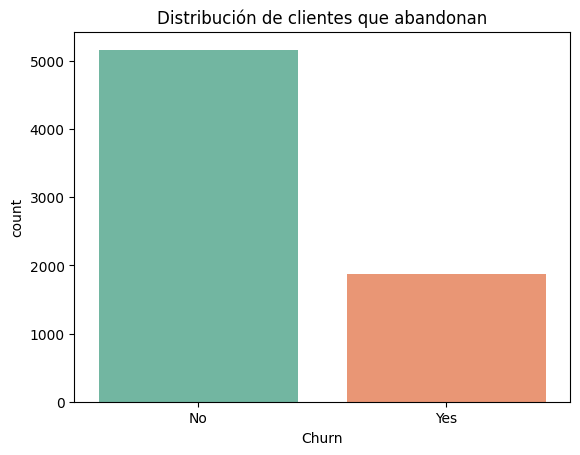

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


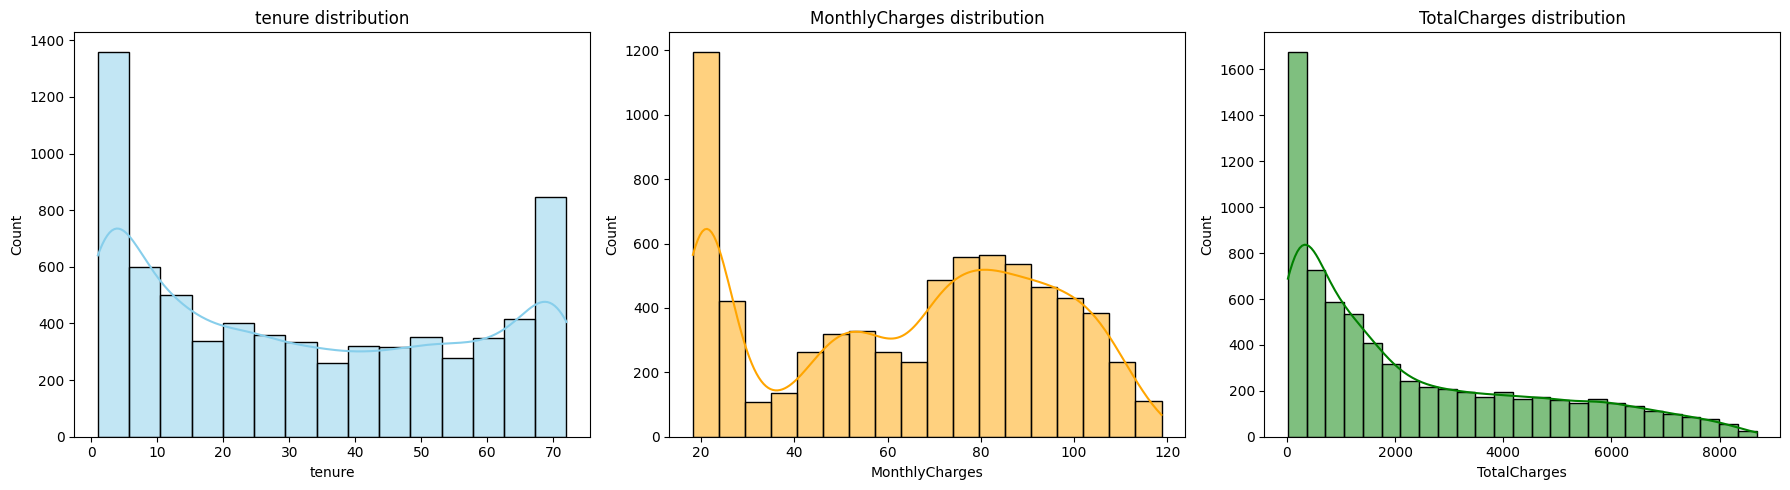

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución del target
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Distribución de clientes que abandonan")
plt.show()

# Rate of churn
churn_rate = df["Churn"].value_counts(normalize=True) * 100
print(churn_rate)

# Density plots for numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["tenure"], kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("tenure distribution")

sns.histplot(df["MonthlyCharges"], kde=True, ax=axes[1], color="orange")
axes[1].set_title("MonthlyCharges distribution")

sns.histplot(df["TotalCharges"], kde=True, ax=axes[2], color="green")
axes[2].set_title("TotalCharges distribution")

plt.tight_layout()
plt.show()